# Аналитика курпного интернет магазина. А/В-тест.

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Часть 1. Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

Задача

•	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

•	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

•	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста.

Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.
Задача
Проанализируйте A/B-тест:
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Информация о колонках в датасете:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Импортируем нужные библиотеки, загрузим данные.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

from collections import defaultdict 

from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

data.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


 В датасете присутствет 1 коланка типа Object и 4 колонки типа int64. Всего в датафремйме 9 строк.

In [4]:
#переведем названия столбцов в нижний регистр для удобства
data.columns = [x.lower() for x in data.columns.values]

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)

data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE - это гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Добавим полученные значения RICE к существующей таблице. Новый столбец назовем RICE.

In [6]:
data['RICE'] = ((data['reach']*data['impact']*data['confidence']) / data['efforts']).round(2)

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
data[['hypothesis', 'ICE', 'RICE']]

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2


Наиболее перспективные гипотезы по RICE - гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Наиболее перспективные гипотезы по ICE (влияние, уверенность, усилия) - это

* "Запустить акцию, дающую скидку на товар в день рождения"

* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

На первом месте гипотеза  "Запустить акцию, дающую скидку на товар в день рождения". У нее высокие Impact и Confidence. Далее идут гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - у них также довольно сильные показатели Impact и Confidence. Efforts при этом 5-6.

Наиболее перспективные гипотезы по RICE (влияние, уверенность, усилия, охват) - это

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр reach равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

### Вывод.

Изучен файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Применен фреймворк ICE для приоритизации гипотез. Наиболее перспективные гипотезы по ICE - это гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Применен фреймворк RICE для приоритизации гипотез. Наиболее перспективные гипотезы по RICE - гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

## Часть 2. Анализ A/B-теста.

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Описание данных из /datasets/orders.csv

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Описание данных из /datasets/visitors.csv

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Предобработка данных.

Подгрузим датасеты, проверим их на наличие пропусков и соответствие типам данных, а также правильность выгрузки.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nНачальная дата {}, конечная дата {}\n'.format(orders['date'].min(), orders['date'].max()))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
orders.head(5)


Начальная дата 2019-08-01, конечная дата 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() для категориальных данных.

In [9]:
orders['transactionId'].value_counts()

1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transactionId, Length: 1197, dtype: int64

Всего в датафрейме у нас 1197 транзакций, все уникальные.

In [10]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

In [11]:
orders['visitorId'].count()

1197

В датафрейме с заказами у нас фигурирует 1031 уникальных пользователя. Самое большое число заказов по покупателю - 11. Всего записей также 1197.

In [12]:
orders['date'].value_counts()

2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-15    46
2019-08-06    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-26    41
2019-08-22    41
2019-08-09    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-18    26
2019-08-11    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

In [13]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Представлены заказы за август 2019 года. 1197 строк всего, из них уникальных - 31. Самая часто встречающаяся дата - 2019-08-05, в этот день было совершено 48 заказов.

In [14]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В колонке с группами тестирования у нас неравное число участников: в группе А - 557 человек, в группе B - 640.

In [15]:
# проверим на дубликаты
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


Дубликатов нет.

In [16]:
# посмотрим на нулевые значения
pd.DataFrame(round((orders.isna().mean()*100),2))

,0
transactionId,0.0
visitorId,0.0
date,0.0
revenue,0.0
group,0.0


Нулевых значений нет.

In [17]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nНачальная дата {}, конечная дата {}\n'.format(visitors['date'].min(), visitors['date'].max()))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()
visitors.head(5)


Начальная дата 2019-08-01, конечная дата 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() для категориальных данных.

In [18]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Всего 62 строки, каждая дата повторяется по 2 раза (для групп А и В), уникальных значений - 31, так же, как и в датафреймес заказами.

In [19]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Всего по 31 записи в группах А и В.

In [20]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

Всего 62 строки с информацией о числе посетителей. Самое большое число посетителей - 770, самое маленькое - 361.

In [21]:
visitors[visitors.duplicated()]

,date,group,visitors


Дубликатов нет.

In [22]:
# посмотрим на нулевые значения
pd.DataFrame(round((visitors.isna().mean()*100),2))

,0
date,0.0
group,0.0
visitors,0.0


Нулевых значений нет.

**Вывод**

Загружены и подготовлены данные для анализа.

Датафрейм с заказами состоит из 5 колонок: transactionId типа int64, visitorId типа int64, date типа object, revenue типа int64, group типа object. Дата переведена в datetime. Выполнена проверка данных в колонкках на корректность.

Всего в датафрейме у нас 1197 транзакций, все уникальные. В датафрейме у нас фигурирует 1031 уникальных пользователя. Самое большое число заказов по покупателю - 11.

Представлены заказы за август 2019 года. 1197 строк всего, из них уникальных - 31. Самая часто встречающаяся дата - 2019-08-05, в этот день было совершено 48 заказов.

В колонке с группами тестирования у нас неравное число участников: в группе А - 557 человек, в группе B - 640. Дубликатов и нулевых значений нет.

Датафрейм с данными о посещениях содержит 62 строки. Колонка date типа object, колонка group типа object и колонка visitors типа int64. Дата приведена к datetime.

Каждая дата в датафрейме повторяется по 2 раза (для групп А и В), уникальных значений - 31, так же, как и в датасете с заказами. Всего по 31 записи в группах А и В.

Самое большое число посетителей - 770, самое маленькое - 361. Дубликатов и нулевых значений не обнаружено.

### Проверка корректности распределения на группы A/B.

* Проверим размеры групп в выборке, есть ли разница между ними
* Проверим, корректно ли был рассчитан размер выборки для проведения теста

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


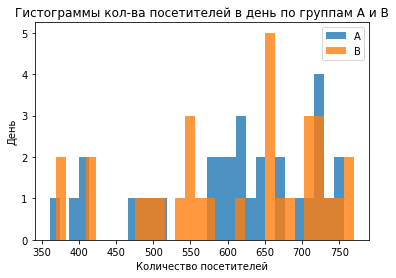

P-value:0.7301376549390499
Разница в количестве посетителей в группах A и B статистически НЕ значима

Начальная конверсия: 0.030
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121

Вводим начальную конверсию и полученное относительное изменение конверсии в калькулятор
Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html
Получаем необходимое количество выборки 35855 для корректного проведения тестирования
В нашем случае количество 37652 посещений
Кол-во выборки для A/B тестирования корректно подобрано, статистически значимой разницы
в количестве посещений м/у группами не обнаружено.



In [23]:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))
plt.hist(visitors[visitors['group']=='A']['visitors'], alpha = 0.8, label='A', bins = 30)
plt.hist(visitors[visitors['group']=='B']['visitors'], alpha = 0.8, label='B', bins = 30)
plt.legend()
plt.title('Гистограммы кол-ва посетителей в день по группам A и B')
plt.xlabel('Количество посетителей')
plt.ylabel('День')
plt.show()

results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')

initial_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
resulting_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print('Начальная конверсия: {:.3f}'.format(initial_conversion))
print('Полученная после изменений конверсия: {:.3f}'.format(resulting_conversion))
print('Относительное изменение конверсии после изменений: {:.3f}'.format(abs(1-(initial_conversion/resulting_conversion))))
print('\nВводим начальную конверсию и полученное относительное изменение конверсии в калькулятор\n'
     'Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html\n'
     'Получаем необходимое количество выборки 35855 для корректного проведения тестирования\n'
     'В нашем случае количество {} посещений\n'
      'Кол-во выборки для A/B тестирования корректно подобрано, ' 
      'статистически значимой разницы\nв количестве посещений м/у группами не обнаружено.\n'.format(visitors['visitors'].sum()))

Проверим и отбросим тех пользователей, которые оказались в обеих группах одновременно.

In [24]:
orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


In [25]:
# создадим список с visitorId пользователей, попавших в обе группы
no_uniq_visitorId = orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')
no_uniq_visitorId = no_uniq_visitorId['visitorId'].tolist()

# исключим из таблицы orders пользователей, попавших в обе группы
orders = orders.query('visitorId not in @no_uniq_visitorId')

# проверим результат
orders['visitorId'].count()

1016

### Кумулятивные метрики.

#### Построим график кумулятивной выручки по группам.

In [26]:
# достаем уникальные значения дат и групп
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

# выводим кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# выводим кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# сводим все накопительные данные в одну таблицу
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


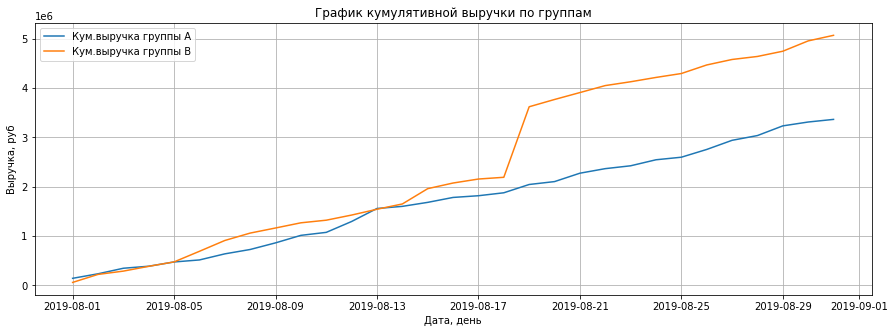

Выводы:
Как мы видим, группа B стабильно показывает большую выручку чем группа A


In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата, день')
plt.ylabel('Выручка, руб')
plt.legend() ;
plt.show()
print('Выводы:')
print('Как мы видим, группа B стабильно показывает большую выручку чем группа A')

#### Построим график кумулятивного среднего чека по группам.

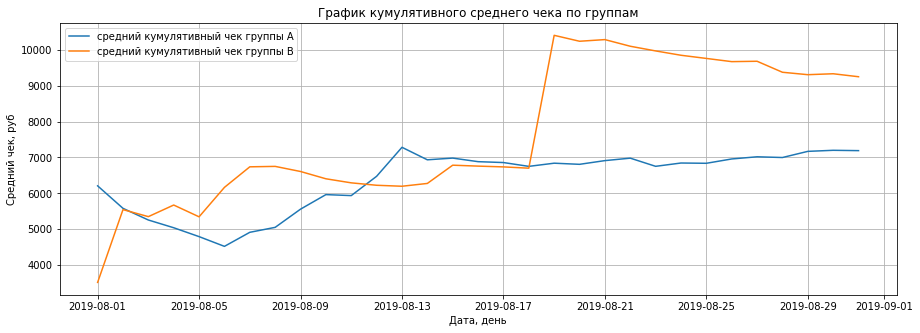

Выводы:
Как мы видим, средний чек в группе B почти всё время был выше, но нас должно 
смутить его резкое колебание во второй половине графика, есть вероятность что оно обусловлено аномалиями.


In [28]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата, день')
plt.ylabel('Средний чек, руб')
plt.legend()
plt.show()
print('Выводы:')
print('Как мы видим, средний чек в группе B почти всё время был выше, но нас должно \nсмутить '
      'его резкое колебание во второй половине графика, есть вероятность что оно обусловлено аномалиями.')

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Cобирем данные в одном датафрейме и потом построим график относительного изменения кумулятивного среднего чека групп.

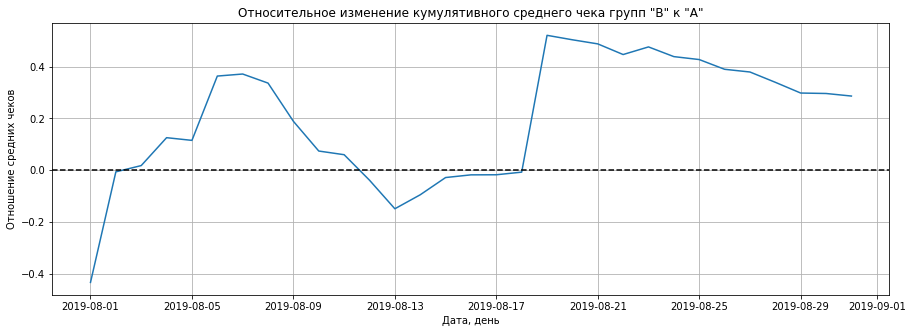

Выводы:
Как мы и говорили, колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей.


In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.xlabel('Дата, день')
plt.ylabel('Отношение средних чеков')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
print('Выводы:')
print('Как мы и говорили, колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей.')

#### Построим график кумулятивной конверсии по группам.

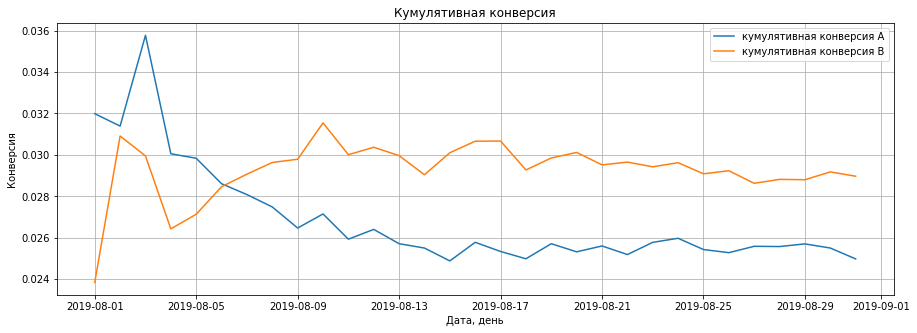

Выводы:
Группа B стабильно показывает большую конверсию чем группа A, это обнадеживает


In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата, день')
plt.ylabel('Конверсия')
plt.legend();
plt.show()
print('Выводы:')
print('Группа B стабильно показывает большую конверсию чем группа A, это обнадеживает')

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

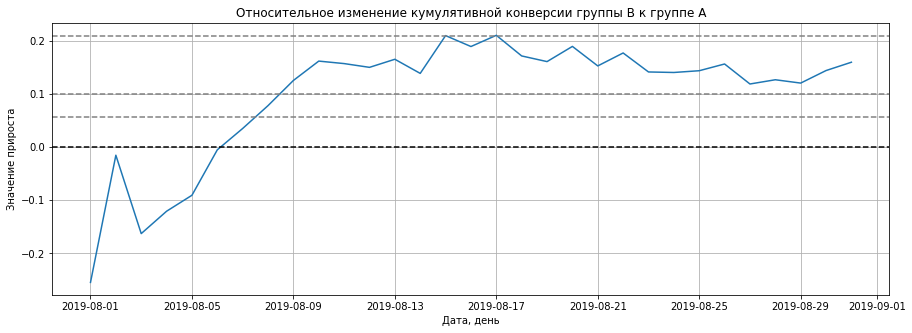

Выводы:
Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала.


In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата, день')
plt.ylabel('Значение прироста')
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--')
plt.show()
print('Выводы:')
print('Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала.')

### Анализ выбросов и всплесков.

#### Построим точечный график количества заказов по пользователям.

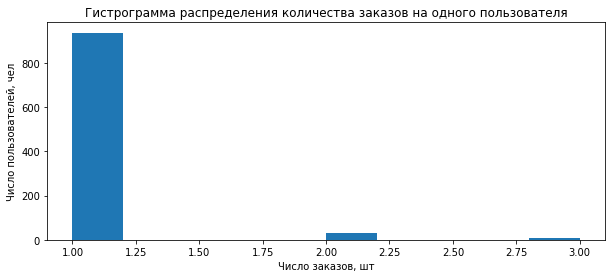

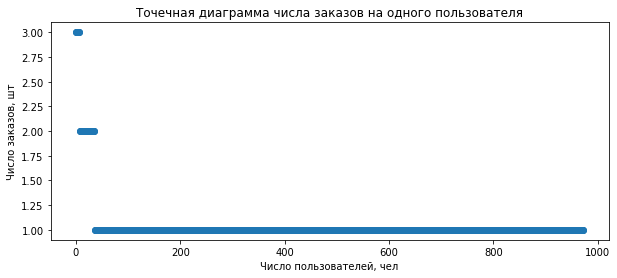

Выводы:
Судя по граифкам, подавляющее большинство пользователей не совершает более 1 заказа.


In [32]:
orders.head(5)
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(5)
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Число заказов, шт')
plt.ylabel('Число пользователей, чел')
plt.show()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.show()
print('Выводы:')
print('Судя по граифкам, подавляющее большинство пользователей не совершает более 1 заказа.')

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [33]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))
print('\nВыводы:')
print('Как мы и предполагали, больше 1 заказа совершают только 5% пользователей.')

Перцентили:
95: 1.0
99: 2.0

Выводы:
Как мы и предполагали, больше 1 заказа совершают только 5% пользователей.


#### Построим точечный график стоимостей заказов.

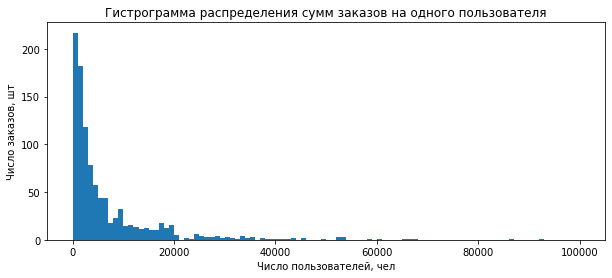

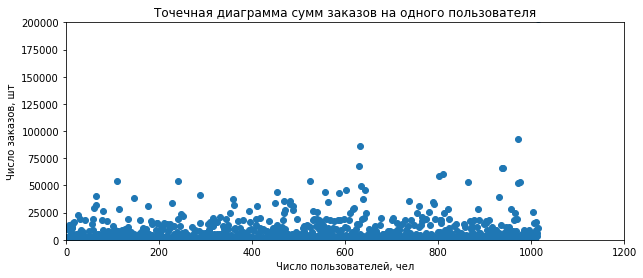

Выводы:
Судя по графикам, большая часть пользователей делает покупки суммой не больше 25-30 т.р. Проверим это далее.


In [34]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.show()
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.axis([0, 1200, 0, 200000])
plt.show()
print('Выводы:')
print('Судя по графикам, большая часть пользователей делает покупки суммой не больше 25-30 т.р. Проверим это далее.')

#### Посчитаем 95-й и 99-й перцентили сумм заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [35]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))
print('\nВыводы:')
print('Всего лишь 5% заказов дороже 26 785 руб.')

Перцентили:
95: 26785
99: 53904

Выводы:
Всего лишь 5% заказов дороже 26 785 руб.


#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их:

In [36]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Теперь сольём всё в одну таблицу:

In [37]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
21,2019-08-22,10,92365,21,141728,339,2366147,401,4050134,609,650,13459,13524
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

Сформулируем гипотезы

Н0 - различия в конверсиях между группами А и В по «сырым» данным статистически не значимы

Н1 - различия в конверсиях между группами А и В по «сырым» данным статистически значимы


In [38]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


**Вывод:**

p-value = 0,011 меньше 0,05, следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем. Это значит, что по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 16,0% .

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

Сформулируем гипотезы

Н0 - различия в среднем чеке между группами А и В по «сырым» данным статистически не значимы

Н1 - различияв среднем чеке между группами А и В по «сырым» данным статистически значимы


In [39]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287


**Вывод:**

P-value значительно больше 0,05, следоваетльно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть, средние чеки по "сырым" данным схожи. При этом, средний чек группы B значительно выше среднего чека группы A (на ~29% !). Однако, наблюдаемое различие в 28,7%  не является статистически занчимым.

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Ранее мы приняли за аномальных пользователей тех, кто совершил 2 и больше заказов или совершил заказ дороже 26 785 рублей. Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 26 785 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [40]:
orders_lim = 1
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['userId'], ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['userId']], axis = 0)
revenue_lim = 26785
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Всего аномальных пользователей = 86


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [41]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

Сформулируем гипотезы

Н0 - различия в конверсиях между группами А и В по «очищенным» данным статистически не значимы

Н1 - различия в конверсиях между группами А и В п по «очищенным» данным статистически значимы


In [42]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.016
Относительный показатель 'B' и 'A' = 0.174


**Вывод:**

p-value = 0,009 меньше 0,05, следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем. Это значит, что по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 18,9% (выше, чем с «сырыми» данными - 16,0%).

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.¶

А теперь мосмотрим произошло ли что-нибудь с результатами по среднему чеку?

Сформулируем гипотезы

Н0 - различия в среднем чеке между группами А и В по «очищенным» данным статистически не значимы

Н1 - различия в среднем чеке между группами А и В по «очищенным» данным статистически значимы

In [43]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.727
Относительный показатель 'B' и 'A' = -0.034


**Вывод:**

P-value значительно больше 0,05, следовательно причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "сырыми" данными). А вот средний чек группы B оказался незначительно (на 2,2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на ~29%  (всё это из-за одного того самого аномального заказа № 425 на 1,3 млн.!) Однако, наблюдаемое различие в 28,7% не является статистически занчимым.

### Решение по результатам теста.

По результатам тестирования было выявлено:

И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 18,9% по "очищенным" и 16,0% по "сырым" данным.

Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2,2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше  на ~29% (всё это из-за одного того самого аномального заказа №425 на 1,3 млн. руб., однако, наблюдаемое различие в 28,7% не является статистически занчимым). Логично, что аномальный заказ убрали и чеки сравнялись.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным в случае, если нам достаточно улучшения метрики - конверсии. Если важно добиться улучшения двух метрик (конверсия и средний чек), то тест следует остановить и признать неуспешным, так как маловероятно, что в рамках теста мы добьемся статистически значимого различия по среднему чеку между группами.
Показатели прежде всего определяются целью проекта - в данном случае это увеличение выручки. Для более полного понимания о значимости той или иной метрики рекомендуется дополнительно пообщаться с заказчиком, либо представить два варианта событий на выбор.

## Вывод

В рамках днной работы были следующие задачи:

* применен фреймворк ICE для приоритезации гипотез. На 1 месте оказалась гипотеза № 8 Запустить акцию, дающую скидку на товар в день рождения со значением ICE равным 16,2, далее по уменьшению идут 0 и 7 гипотезы;
* применен фреймворк RICE для приоритизации гипотез. На 1 месте оказалась гипотеза № 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок со значением RICE равным 112, далее по уменьшению идут 2, а также 0 и 6 гипотезы на одном уровне.

Показатели ICE и RICE в приоритете определяют разные гипотезы, на это повлиял показатель reach - охват пользователей, которых затронет изменение, которое планируется внести.

* проанализирована стабильность кумулятивных метрик:

Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы B в одной точке резко растёт. Это первый сигнал, говорящий о наличии всплеска числа заказов, либо о появлении очень дорогих заказов в выборке.
Графики среднего чека не являются равномерными, в течение всего периода наблюдается пересечение графиков группы А и В. График группы B в середине августа резко вырос, это также может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
График конверсий ассиметричен, первоначально преобладала конверсия группы А, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
Относительные различия среднего чека между группами резко «скачет» на протяжении всего периода, лишь в нескольких точках различия близки к 0. По графику можно понять, что присутствуют крупные заказы и выбросы.
Относительные изменения кумулятивной конверсии отражена в том, что в начале теста группа B частично проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но затем постепенно растёт.

* проанализированы аномалии и всплески, определены нижник границы допустимых значений: 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рубля, 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя. За аномальных пользователей были приняты те, кто совершил от 1 заказов или совершил заказ дороже 26 785 рублей. Таким образом мы убрали от 1% до 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.

* провели анализ A/B теста:
статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий присутствуют;
нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

Тест следует остановить и признать его успешным в случае, если нам достаточно улучшения метрики - конверсии. Если важно добиться улучшения двух метрик (конверсия и средний чек), то тест следует остановить и признать неуспешным, так как маловероятно, что в рамках теста мы добьемся статистически значимого различия по среднему чеку между группами.